<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/02141.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.4 动量法

### 7.4.1 梯度下降的问题

epoch 20, x1 -0.943467, x2 -0.000073


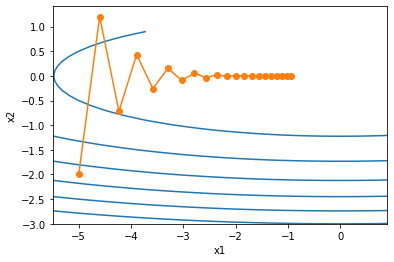

In [2]:
%matplotlib inline 
import torch 
import d2l 


eta = 0.4 

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2 

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


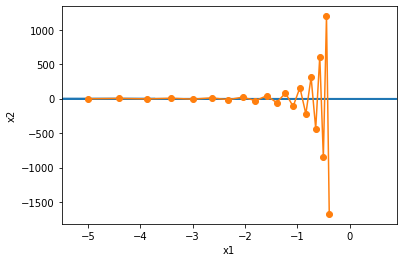

In [3]:
eta = 0.6 
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

### 7.4.2 动量法

epoch 20, x1 -0.062843, x2 0.001202


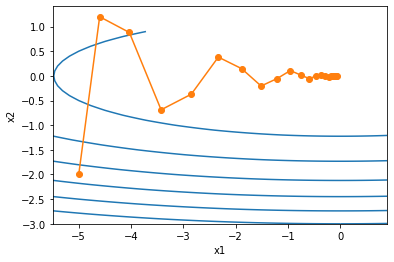

In [4]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1 
    v2 = gamma * v2 + eta * 4 * x2 
    return x1 - v1, x2 - v2, v1, v2 

eta, gamma = 0.4, 0.5 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


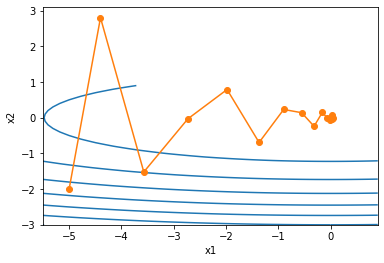

In [5]:
eta = 0.6 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

### 7.4.3 从零开始实现

In [0]:
!mkdir ../../data 

In [7]:
!git clone https://github.com/ShusenTang/Dive-into-DL-PyTorch.git

Cloning into 'Dive-into-DL-PyTorch'...
remote: Enumerating objects: 1692, done.
remote: Total 1692 (delta 0), reused 0 (delta 0), pack-reused 1692
Receiving objects: 100% (1692/1692), 25.29 MiB | 52.63 MiB/s, done.
Resolving deltas: 100% (975/975), done.


In [0]:
!cp Dive-into-DL-PyTorch/data/airfoil_self_noise.dat ../../data

In [0]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    v_b = torch.zeros(1, dtype=torch.float32)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v.data = hyperparams['momentum'] * v.data + hyperparams['lr'] * p.grad.data 
        p.data -= v.data

loss: 0.243444, 0.064376 sec per epoch


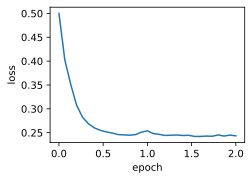

In [10]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.249776, 0.080607 sec per epoch


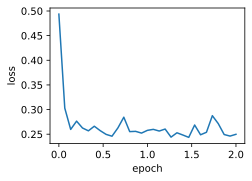

In [11]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.243380, 0.067848 sec per epoch


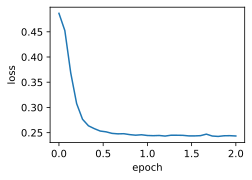

In [12]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.004, 'momentum': 0.9}, features, labels)

### 7.4.4 简洁实现

loss: 0.243055, 0.070656 sec per epoch


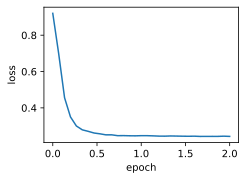

In [13]:
d2l.train_pytorch_ch7(torch.optim.SGD, {'lr': 0.004, 'momentum': 0.9}, features, labels)